<h1> OSMnx </h1>
This week we will explore a Python package called OSMnx that can be used to retrieve street networks from OpenStreetMap, and construct, analyse, and visualise them. OSMnx can also fetch data about Points of Interest, such as restaurants, schools, and different kinds of services. The package also includes tools to find routes on a network downloaded from OpenStreetMap, and implements algorithms for finding shortest connections for walking, cycling, or driving.

<h1> NetworkX </h1>
We will also use NetworkX to manipulate and analyse the street network data retrieved from OpenStreetMap. NetworkX is a Python package that can be used to create, manipulate, and study the structure, dynamics, and functions of complex networks.

<h1> Download and visualise OpenStreetMap data with OSMnx </h1>
A useful feature of OSMnx is its easy-to-use tools to download OpenStreetMap data via the project’s OverPass API. In this section, we will learn how to download and visualise the street network and additional data from OpenStreetMap covering an area of interest.

<h2> Street network </h2>
The osmnx.graph module downloads data to construct a routable road network graph, based on an user-defined area of interest. This area of interest can be specified, for instance, using a place name, a bounding box, or a polygon. Here, we will use a placename for fetching data covering the Kamppi area in Helsinki, Finland.

In the place name query, OSMnx uses the Nominatim Geocoding API. This means that place names should exist in the OpenStreetMap database (run a test search at openstreetmap.org or nominatim.openstreetmap.org).

We will read an OSM street network using OSMnx’s graph_from_place() function:

In [1]:
import osmnx

PLACE_NAME = "Kamppi, Helsinki, Finland"
graph = osmnx.graph_from_place(PLACE_NAME)

In [2]:
type(graph)

networkx.classes.multidigraph.MultiDiGraph

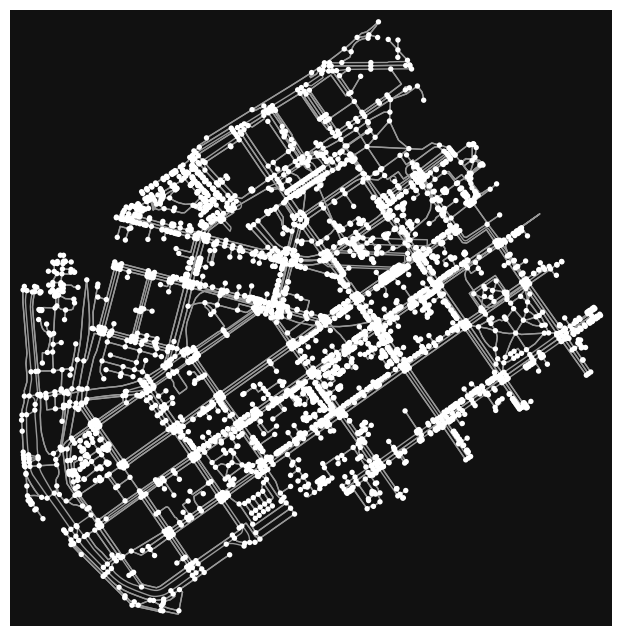

In [3]:
# graphs don't have a plot function built in - but osmnx has one that takes a graph as input
figure, ax = osmnx.plot_graph(graph)

Just as its GeoPandas and Pandas equivalents, osmnx.plot_graph() uses matplotlib. The function returns a (figure, axes) tuple, that can be used to modify the figure using all matplotlib functions we already got to know.

We can see that our graph contains nodes (the points) and edges (the lines) that connects those nodes to each other.

<h1> Convert a graph to a GeoDataFrame </h1>
The street network we just downloaded is a graph, more specifically a networkx.MultiDiGraph. Its main purpose is to represent the topological relationships between nodes and the links (edges) between them. Sometimes, it is more convenient to have the underlying geodata in geopandas.GeoDataFrames. OSMnx comes with a convenient function that converts a graph into two geo-data frames, one for nodes, and one for edges: osmnx.graph_to_gdfs().

In [4]:
nodes, edges = osmnx.graph_to_gdfs(graph)
nodes.head()

,y,x,street_count,highway,ref,geometry
osmid,,,,,,
25216594,60.164794,24.921057,5,NaN,NaN,POINT (24.92106 60.16479)
25238874,60.163663,24.921029,4,NaN,NaN,POINT (24.92103 60.16366)
25238883,60.163452,24.921441,4,crossing,NaN,POINT (24.92144 60.16345)
25238933,60.161114,24.924529,3,NaN,NaN,POINT (24.92453 60.16111)
25238937,60.160860,24.925861,3,NaN,NaN,POINT (24.92586 60.16086)


In [5]:
edges.head()

osmid  oneway lanes            name   highway  \
u        v          key                                                      
25216594 1372425721 0     23717777    True     2   Porkkalankatu   primary   
         1372425714 0     23856784    True     2  Mechelininkatu   primary   
25238874 336192701  0     29977177    True     3  Mechelininkatu   primary   
         1519889266 0    930820886    True     1    Itämerenkatu  tertiary   
25238883 568147264  0     58077048    True     4  Mechelininkatu   primary   

                        maxspeed reversed  length  \
u        v          key                             
25216594 1372425721 0         40    False  10.404   
         1372425714 0         40    False  40.885   
25238874 336192701  0         40    False   6.101   
         1519889266 0         30    False  10.885   
25238883 568147264  0         40    False  15.388   

                                                                  geometry  \
u        v          key                                                      
25216594 1372425721 0    LINESTRING (24.92106 60.16479, 24.92087 60.16479)   
         1372425714 0    LINESTRING (24.92106 60.16479, 24.92095 60.164...   
25238874 336192701  0    LINESTRING (24.92103 60.16366, 24.92104 60.16361)   
         1519889266 0    LINESTRING (24.92103 60.16366, 24.92083 60.16366)   
25238883 568147264  0    LINESTRING (24.92144 60.16345, 24.92140 60.16359)   

                        junction width tunnel access service bridge  
u        v          key                                              
25216594 1372425721 0        NaN   NaN    NaN    NaN     NaN    NaN  
         1372425714 0        NaN   NaN    NaN    NaN     NaN    NaN  
25238874 336192701  0        NaN   NaN    NaN    NaN     NaN    NaN  
         1519889266 0        NaN   NaN    NaN    NaN     NaN    NaN  
25238883 568147264  0        NaN   NaN    NaN    NaN     NaN    NaN

<h1> Place polygon </h1>
Let’s also plot the polygon that represents our area of interest (Kamppi, Helsinki). We can retrieve the polygon geometry using the [osmnx.geocode_to_gdf()](https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=geocode_to_gdf(#osmnx.geocoder.geocode_to_gdf) function.

In [6]:
# Get place boundary related to the place name as a geodataframe
area = osmnx.geocode_to_gdf(PLACE_NAME)

# Check the data type
type(area)

geopandas.geodataframe.GeoDataFrame

In [7]:
# Check data values
area

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"POLYGON ((24.92064 60.16483, 24.92069 60.16447...",60.172075,60.160469,24.943453,24.920643,180300156,relation,184714,60.167626,24.931709,boundary,administrative,20,0.430313,suburb,Kamppi,"Kamppi, Southern major district, Helsinki, Hel..."


<AxesSubplot: >

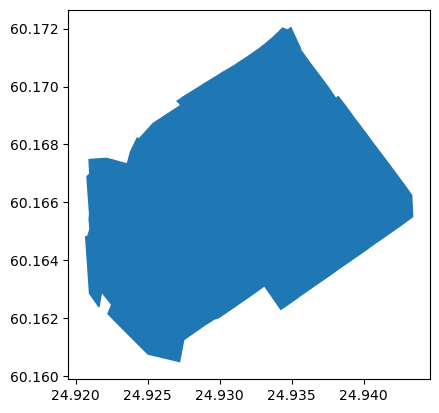

In [8]:
area.plot()

<h1> Building footprints </h1>
Besides network data, OSMnx can also download any other data contained in the OpenStreetMap database. This includes, for instance, building footprints, and different points-of-interests (POIs). To download arbitrary geometries, filtered by OSM tags and a place name, use osmnx.geometries_from_place() [geometries is soon deprecated - Let’s already use features instead]. The tag to retrieve all buildings is building = yes.

In [9]:
buildings = osmnx.geometries_from_place(
    PLACE_NAME,
    {"building": True},
)
buildings.head()

ele  \
element_type osmid              
node         11711721042  NaN   
way          8035238      NaN   
             8042297      NaN   
             14797170     NaN   
             14797171     NaN   

                                                                   geometry  \
element_type osmid                                                            
node         11711721042                          POINT (24.92714 60.16420)   
way          8035238      POLYGON ((24.93563 60.17045, 24.93557 60.17054...   
             8042297      POLYGON ((24.92938 60.16795, 24.92933 60.16797...   
             14797170     POLYGON ((24.92427 60.16648, 24.92427 60.16650...   
             14797171     POLYGON ((24.92390 60.16729, 24.92391 60.16731...   

                         amenity          operator wheelchair  source access  \
element_type osmid                                                             
node         11711721042     NaN      Nice Bike Oy        NaN     NaN    NaN   
way          8035238         NaN               NaN        NaN     NaN    NaN   
             8042297         NaN               NaN        NaN     NaN    NaN   
             14797170        NaN  City of Helsinki        NaN  survey    NaN   
             14797171        NaN               NaN        NaN  survey    NaN   

                         addr:housenumber      addr:street addr:unit  ...  \
element_type osmid                                                    ...   
node         11711721042               46      Eerikinkatu       NaN  ...   
way          8035238                22-24  Mannerheimintie       NaN  ...   
             8042297                    2   Runeberginkatu       NaN  ...   
             14797170                  10  Lapinlahdenkatu       NaN  ...   
             14797171                 NaN              NaN       NaN  ...   

                         lippakioski toilets:disposal unisex covered area  \
element_type osmid                                                          
node         11711721042         NaN              NaN    NaN     NaN  NaN   
way          8035238             NaN              NaN    NaN     NaN  NaN   
             8042297             NaN              NaN    NaN     NaN  NaN   
             14797170            NaN              NaN    NaN     NaN  NaN   
             14797171            NaN              NaN    NaN     NaN  NaN   

                         leisure ways type electrified nohousenumber  
element_type osmid                                                    
node         11711721042     NaN  NaN  NaN         NaN           NaN  
way          8035238         NaN  NaN  NaN         NaN           NaN  
             8042297         NaN  NaN  NaN         NaN           NaN  
             14797170        NaN  NaN  NaN         NaN           NaN  
             14797171        NaN  NaN  NaN         NaN           NaN  

[5 rows x 121 columns]

As you can see, there are several columns in buildings. Each column contains information about a specific tag that OpenStreetMap contributors have added. Each tag consists of a key (the column name), and a values (for example building=yes or building=school). Read more about tags and tagging practices in the OpenStreetMap wiki.

<h1> Points of interest </h1>
Point-of-interest (POI) is a generic concept that describes point locations that represent places of interest. As osmnx.geometries_from_place() can download any geometry data contained in the OpenStreetMap database, it can also be used to download any kind of POI data. [geometries is soon deprecated - Let’s already use features instead]

In OpenStreetMap, many POIs are described using the amenity tag. We can, for example, retrieve all restaurant locations by querying amenity=restaurant.

<h1> Also get open spaces </h1>
Let’s try to fetch all public parks in the Kamppi area. In OpenStreetMap, parks hould be tagged as leisure = park. Smaller green areas (puistikot) are sometimes also tagged landuse = grass. We can combine multiple tags in one data query.

In [10]:
restaurants = osmnx.geometries_from_place(
    PLACE_NAME,
    {
        "amenity": "restaurant"
    }
)
len(restaurants) 

161

In [11]:
# Available columns
restaurants.columns.values 

array(['addr:city', 'addr:country', 'addr:housenumber', 'addr:postcode',
       'addr:street', 'amenity', 'cuisine', 'diet:halal', 'diet:kosher',
       'name', 'payment:credit_cards', 'payment:debit_cards', 'phone',
       'website', 'wheelchair', 'geometry', 'email', 'facebook',
       'indoor_seating', 'level', 'opening_hours', 'outdoor_seating',
       'short_name', 'start_date', 'toilets:wheelchair',
       'delivery:covid19', 'opening_hours:covid19', 'takeaway:covid19',
       'diet:vegetarian', 'fixme', 'name:fi', 'name:zh', 'payment:cash',
       'diet:vegan', 'disused:amenity', 'addr:housename',
       'access:covid19', 'drive_through:covid19', 'takeaway',
       'contact:facebook', 'contact:phone', 'note',
       'opening_hours:brunch', 'source', 'toilets', 'contact:website',
       'capacity', 'smoking', 'dog', 'operator', 'shop', 'check_date',
       'alt_name', 'contact:email', 'established', 'description',
       'diet:non-vegetarian', 'reservation', 'name:sv', 'drive_thr

In [12]:
# Select some useful cols and print
interesting_columns = [
    "name",
    "opening_hours",
    "addr:city",
    "addr:country",
    "addr:housenumber",
    "addr:postcode",
    "addr:street"
]

# Print only selected cols
restaurants[interesting_columns].head(10) 

name  \
element_type osmid                                 
node         60062502                     Kabuki   
             62965963    Restaurant & Bar Fusion   
             76617692               Johan Ludvig   
             76624339                    Shinobi   
             76624351                     Pueblo   
             151006260           Ravintola China   
             151006483  Tony's deli + Street Bar   
             151006932                Haru Sushi   
             151006967           Game Taste Cafe   
             151007074                      Koto   

                                                            opening_hours  \
element_type osmid                                                          
node         60062502                                                 NaN   
             62965963                  Mo-Th 11-22; Fr-Sa 11-02; Su 12-20   
             76617692                                                 NaN   
             76624339                We-Th 17:00-23:00; Fr-Sa 16:00-24:00   
             76624351                                                 NaN   
             151006260       Mo-Fr 11:00-23:00; Sa-Su 12:00-23:00; PH off   
             151006483                                                NaN   
             151006932  Mo-Fr 11:00-21:00; Sa 12:00-21:00; Su 13:00-21:00   
             151006967                                                NaN   
             151007074                                                NaN   

                       addr:city addr:country addr:housenumber addr:postcode  \
element_type osmid                                                             
node         60062502   Helsinki           FI               12         00180   
             62965963        NaN          NaN              NaN           NaN   
             76617692   Helsinki           FI              NaN           NaN   
             76624339   Helsinki           FI               38         00120   
             76624351   Helsinki           FI              NaN           NaN   
             151006260  Helsinki           FI               25         00100   
             151006483  Helsinki           FI                7         00120   
             151006932  Helsinki           FI               30         00120   
             151006967  Helsinki           FI               21           NaN   
             151007074  Helsinki           FI               22         00120   

                            addr:street  
element_type osmid                       
node         60062502   Lapinlahdenkatu  
             62965963               NaN  
             76617692               NaN  
             76624339      Albertinkatu  
             76624351       Eerikinkatu  
             151006260        Annankatu  
             151006483        Bulevardi  
             151006932    Fredrikinkatu  
             151006967    Lönnrotinkatu  
             151007074    Lönnrotinkatu

In [14]:
parks = osmnx.geometries_from_place(
    PLACE_NAME,
    {
        "leisure": "park",
        "landuse": "grass",
    },
)
parks.head()

geometry  \
element_type osmid                                                         
way          8042256   POLYGON ((24.93566 60.17132, 24.93566 60.17130...   
             8042613   POLYGON ((24.93701 60.16947, 24.93627 60.16919...   
             15218362  POLYGON ((24.92330 60.16499, 24.92323 60.16500...   
             15218739  POLYGON ((24.92741 60.16575, 24.92741 60.16574...   
             15223911  POLYGON ((24.93126 60.16589, 24.93075 60.16624...   

                      access  source addr:city  \
element_type osmid                               
way          8042256     NaN     NaN       NaN   
             8042613     NaN     NaN       NaN   
             15218362    NaN  survey       NaN   
             15218739    NaN     NaN       NaN   
             15223911    NaN     NaN       NaN   

                                                                   nodes  \
element_type osmid                                                         
way          8042256   [292719496, 1001543836, 1037987967, 1001544060...   
             8042613   [552965718, 293390264, 295056669, 256264975, 1...   
             15218362  [150532954, 150532964, 150532958, 150532959, 2...   
             15218739  [1876856069, 1876856056, 1876856052, 187685606...   
             15223911  [1008235303, 1008235126, 1008235240, 100823522...   

                      leisure                     name  \
element_type osmid                                       
way          8042256     park  Pikkuparlamentin puisto   
             8042613     park           Simonpuistikko   
             15218362    park       Työmiehenpuistikko   
             15218739    park              Lastenlehto   
             15223911    park    Lapinlahden puistikko   

                                       name:fi                  name:sv  \
element_type osmid                                                        
way          8042256   Pikkuparlamentin puisto  Lilla parlamentets park   
             8042613            Simonpuistikko            Simonsskvären   
             15218362       Työmiehenpuistikko            Arbetarparken   
             15218739              Lastenlehto              Barnslunden   
             15223911    Lapinlahden puistikko          Lappviksskvären   

                      hoitoluokitus_viheralue   wikidata  \
element_type osmid                                         
way          8042256                      NaN        NaN   
             8042613                      NaN        NaN   
             15218362                      A2        NaN   
             15218739                      A2  Q18660505   
             15223911                      A2  Q18660481   

                               wikimedia_commons                 wikipedia  \
element_type osmid                                                           
way          8042256                         NaN                       NaN   
             8042613                         NaN                       NaN   
             15218362                        NaN                       NaN   
             15218739  Category:Lastenlehto Park            fi:Lastenlehto   
             15223911                        NaN  fi:Lapinlahden puistikko   

                      landuse alt_name loc_name area ways name:en type  
element_type osmid                                                      
way          8042256      NaN      NaN      NaN  NaN  NaN     NaN  NaN  
             8042613      NaN      NaN      NaN  NaN  NaN     NaN  NaN  
             15218362     NaN      NaN      NaN  NaN  NaN     NaN  NaN  
             15218739     NaN      NaN      NaN  NaN  NaN     NaN  NaN  
             15223911     NaN      NaN      NaN  NaN  NaN     NaN  NaN

<AxesSubplot: >

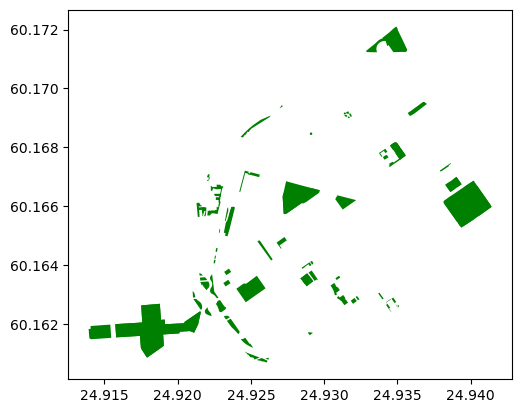

In [15]:
parks.plot(color="green") 

<AxesSubplot: >

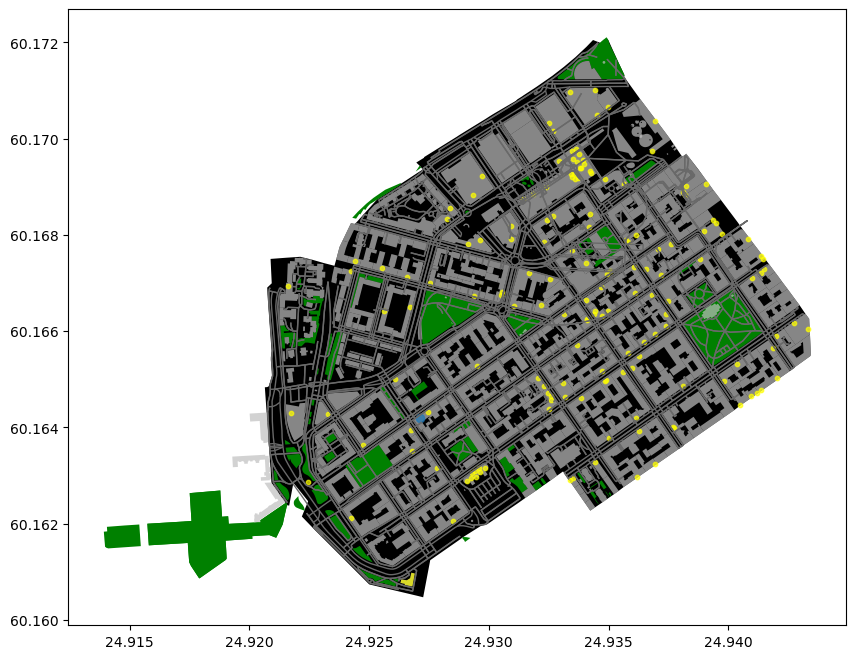

In [16]:
import matplotlib
figure, ax = matplotlib.pyplot.subplots(figsize=(12,8))

# Plot the footprint
area.plot(ax=ax, facecolor="black")

# Plot parks
parks.plot(ax=ax, facecolor="green")

# Plot street ‘edges’
edges.plot(ax=ax, linewidth=1, edgecolor="dimgray")

# Plot buildings
buildings.plot(ax=ax, facecolor="silver", alpha=0.7)

# Plot restaurants
restaurants.plot(ax=ax, color="yellow", alpha=0.7, markersize=10)